#### Use decision trees to prepare a model on fraud data

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [28]:
data = pd.read_csv("Fraud_check.csv")

In [29]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [30]:
data1 = data.copy()

In [5]:
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
data1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [31]:
x = data1.drop(["Taxable.Income"], axis=1)

In [32]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [33]:
label_encoder = preprocessing.LabelEncoder()
x['Undergrad'] = label_encoder.fit_transform(x['Undergrad'])


In [34]:
label_encoder = preprocessing.LabelEncoder()
x['Marital.Status'] = label_encoder.fit_transform(x['Marital.Status'])


In [35]:

x['Urban'] = label_encoder.fit_transform(x['Urban'])


In [36]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [37]:
y = data1[['Taxable.Income']]

In [38]:
y

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


In [39]:
y['tax'] = ['risky'if x<=30000 else 'good' for x in y['Taxable.Income']]

C:\Users\parvin\AppData\Local\Temp\ipykernel_12204\2301896319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['tax'] = ['risky'if x<=30000 else 'good' for x in y['Taxable.Income']]


In [40]:
y

,Taxable.Income,tax
0,68833,good
1,33700,good
2,36925,good
3,50190,good
4,81002,good
...,...,...
595,76340,good
596,69967,good
597,47334,good
598,98592,good


In [41]:
y = y.drop(["Taxable.Income"], axis=1)

In [42]:
y

,tax
0,good
1,good
2,good
3,good
4,good
...,...
595,good
596,good
597,good
598,good


In [43]:
y.tax.value_counts()

good     476
risky    124
Name: tax, dtype: int64

In [44]:
x.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban'],
      dtype='object')

In [45]:
# splitting the data set into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [46]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
332,1,0,84132,1,0
13,0,1,86649,16,1
274,1,1,112584,25,0
257,1,1,31611,17,1
112,1,2,193038,26,1
...,...,...,...,...,...
440,0,2,170407,13,1
165,1,1,38463,23,1
7,1,2,131253,3,1
219,1,0,26814,9,0


In [47]:
y_train

,tax
332,good
13,good
274,good
257,good
112,good
...,...
440,good
165,good
7,good
219,risky


# Building Decision Tree Classifier using Entropy criteria

In [49]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

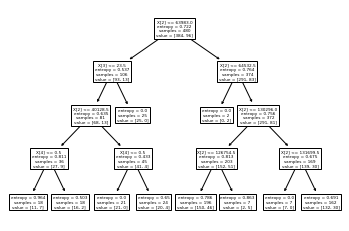

In [50]:
#plot the decision tree
tree.plot_tree(model);

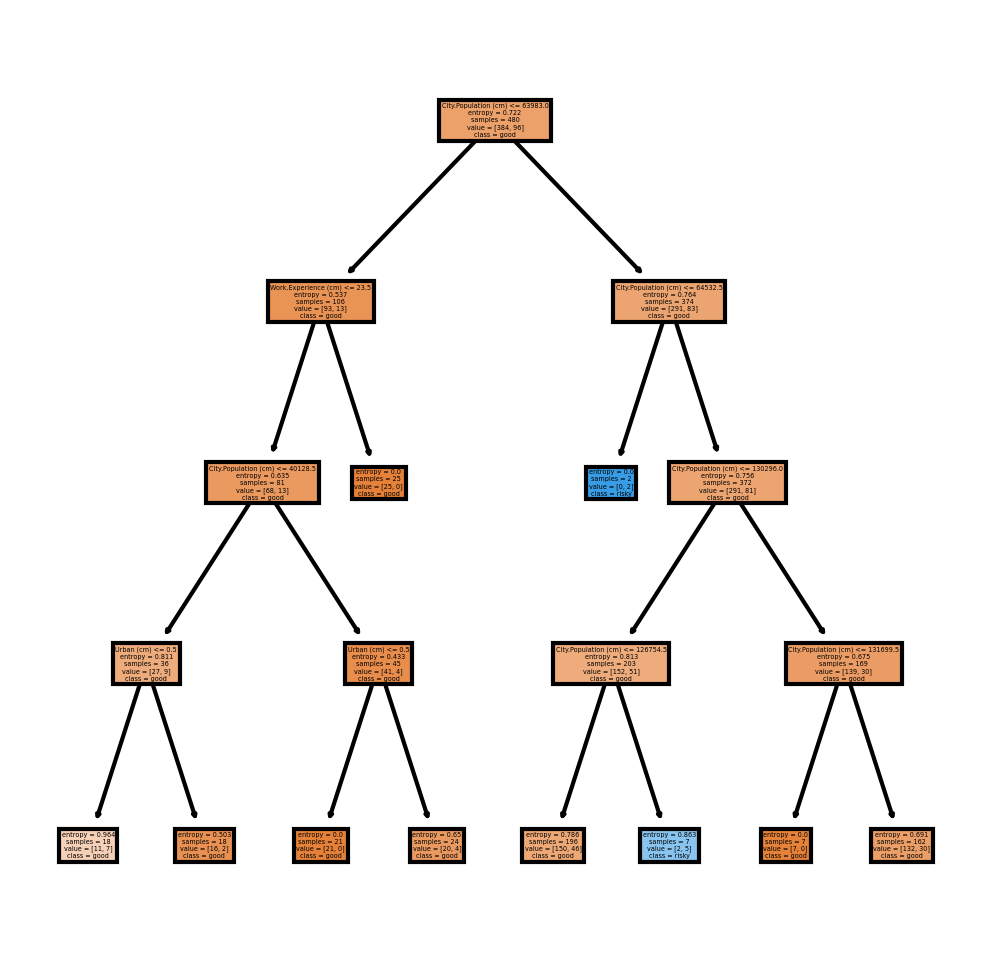

In [51]:
fn = ['Undergrad (cm)','Marital.Status (cm)','City.Population (cm)','Work.Experience (cm)','Urban (cm)']
cn = ['good','risky']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,
              feature_names = fn,
              class_names=cn,
              filled=True);

In [52]:
#predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

good     117
risky      3
dtype: int64

In [53]:
y_test

,tax
159,good
307,good
253,good
528,good
137,risky
...,...
102,good
577,good
18,good
560,good


In [54]:
y_test.value_counts()

tax  
good     92
risky    28
dtype: int64

In [55]:
preds

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'risky',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'risky', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'risky', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
   

In [56]:
#Accuracy
model.score(x_test,y_test)

0.7583333333333333

# 2. With Gini Criteria build a Decision Tree Classifier

In [57]:
model2_gini = DecisionTreeClassifier(criterion='gini', max_depth=5)

In [58]:
model2_gini

DecisionTreeClassifier(max_depth=5)

In [59]:
model2_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=5)

In [60]:
# Predicting on test data

prediction2=model.predict(x_test)

In [61]:
pd.Series(prediction2).value_counts()

good     117
risky      3
dtype: int64

In [63]:
model2_gini.score(x_test,y_test)

0.7583333333333333

In [65]:
model.feature_importances_

array([0.        , 0.        , 0.62646626, 0.16779265, 0.20574109])

In [66]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [67]:
fi

,feature,importance
2,City.Population,0.626466
4,Urban,0.205741
3,Work.Experience,0.167793
0,Undergrad,0.000000
1,Marital.Status,0.000000


In [68]:
model2_gini.feature_importances_

array([0.09027581, 0.04189915, 0.67126367, 0.0424008 , 0.15416058])

In [69]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model2_gini.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [70]:
fi

,feature,importance
2,City.Population,0.671264
4,Urban,0.154161
0,Undergrad,0.090276
3,Work.Experience,0.042401
1,Marital.Status,0.041899


In [ ]:
'''
City population is important feature
'''